In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.svm import SVC

In [2]:
df=pd.read_csv('loan_train.csv')
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban,Loan_Amount_Term_Medium,Loan_Amount_Term_Long
0,5849.0,0.0,128.0,1,1,0,0,0,0,0,0,1,0,1,0,1
1,4583.0,1508.0,128.0,0,1,1,1,0,0,0,0,1,0,0,0,1
2,3000.0,0.0,66.0,1,1,1,0,0,0,0,1,1,0,1,0,1
3,2583.0,2358.0,120.0,1,1,1,0,0,0,1,0,1,0,1,0,1
4,6000.0,0.0,141.0,1,1,0,0,0,0,0,0,1,0,1,0,1


In [3]:
X=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [4]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [5]:
# scaling the numerical columns
scaler = StandardScaler()
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [6]:
model = SVC(random_state=42)
model.fit(X_train, y_train)

SVC(random_state=42)

In [7]:
y_pred = model.predict(X_test)

In [8]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

[[18 25]
 [ 1 79]]
Accuracy: 0.7886178861788617
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



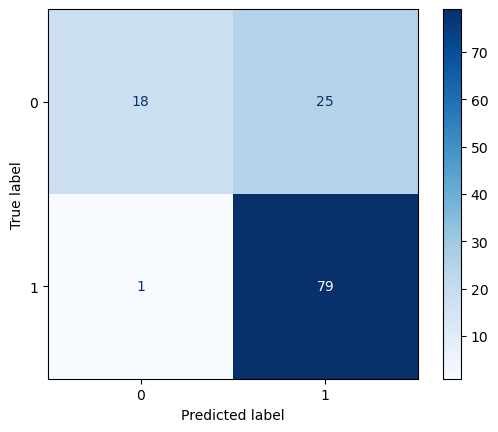

In [10]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix with custom labels
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap="Blues")

## Trainin Model After balancing the Data 

In [11]:
from imblearn.over_sampling import SMOTE

# Define features (X) and target (y)
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Train-test split after resampling
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

print("Before SMOTE:", y.value_counts())
print("After SMOTE:", y_res.value_counts())

Before SMOTE: 1    422
0    192
Name: Loan_Status, dtype: int64
After SMOTE: 0    422
1    422
Name: Loan_Status, dtype: int64


In [12]:
# scaling the numerical columns
scaler = StandardScaler()
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

[[59 35]
 [ 3 72]]
Accuracy: 0.7751479289940828
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.63      0.76        94
           1       0.67      0.96      0.79        75

    accuracy                           0.78       169
   macro avg       0.81      0.79      0.77       169
weighted avg       0.83      0.78      0.77       169



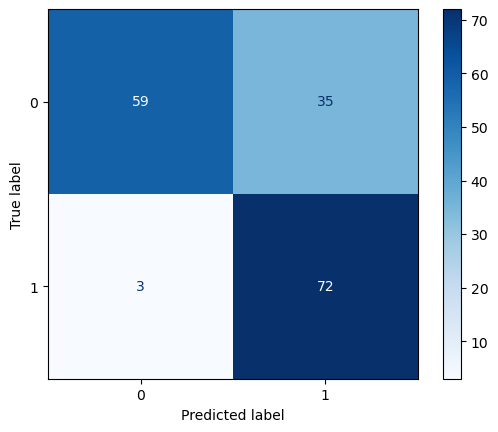

In [14]:
# training model 
model = SVC(random_state=42)
model.fit(X_train, y_train)

# prediction
y_pred = model.predict(X_test)

# evaulating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix with custom labels
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap="Blues")